# **Classification with fully connected networks on the IRIS dataset**

**The required libraries for this exercise are loaded,**<br>
If needed, you can load more libraries:

In [4]:
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In the following code snippet, the features are loaded in x and the corresponding labels are loaded in y.

In [5]:
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y = iris_data.target # Convert data to a single column

Our labels are currently numeric.

These numbers are 0 to 2 and in other words, they have 3 different states.

We convert these labels to one-hot format and put the output again in y.

In [6]:
y = keras.utils.to_categorical(y, num_classes=3)

Below, the data is divided into test and train data:

In [7]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

Make a network with two hidden layers, 10 lights in each layer, and relu activity function.<br>
Also, add a Dropout layer with a rate of 0.5 in the last layer before softmax.

In [8]:
# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 333 (1.30 KB)
Trainable params: 333 (1.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Below is the compiled model.

In [10]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Train the model with batch_size=5 and number of 200 ipacks.

In [11]:
# Train the model
history = model.fit(train_x, train_y,
          epochs=200,
          batch_size=5, validation_data=(test_x, test_y),
                    verbose=False)

Evaluate the model on test data.

In [12]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 126ms/step - loss: 0.1054 - accuracy: 0.9667
Final test set loss: 0.105403
Final test set accuracy: 0.966667


Test Accuracy: 0.9666666388511658 
Maximum Test Acuracy During Training:  0.9666666388511658


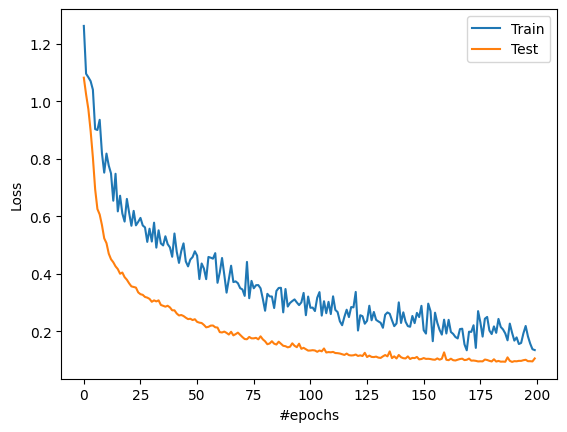

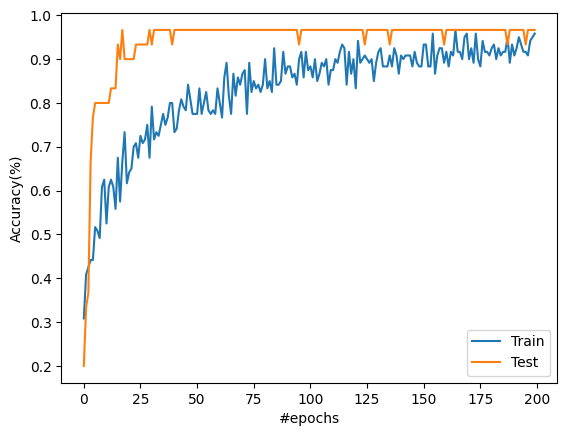

In [13]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()